# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder,
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

np.random.seed(123)

# 2. Read Data

In [2]:
data = pd.read_csv('credit_card_dataset.csv')

data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,5142999,M,Y,N,1 children,166500.0,Secondary / secondary special,Married,With parents,-12372,-5401,1,0,1,0,Core staff,-8,0,0
537663,5010773,F,N,Y,No children,135000.0,Higher education,Married,With parents,-14160,-4635,1,0,0,0,Sales staff,-8,0,0
537664,5105601,M,N,Y,No children,180000.0,Higher education,Married,House / apartment,-24204,-2462,1,0,0,0,Private service staff,-7,0,0
537665,5132833,M,Y,N,No children,220500.0,Secondary / secondary special,Married,House / apartment,-22647,-3847,1,0,1,0,Laborers,-1,0,0


In [3]:
data.drop(['ID'], axis=1, inplace=True)

data

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,M,Y,N,1 children,166500.0,Secondary / secondary special,Married,With parents,-12372,-5401,1,0,1,0,Core staff,-8,0,0
537663,F,N,Y,No children,135000.0,Higher education,Married,With parents,-14160,-4635,1,0,0,0,Sales staff,-8,0,0
537664,M,N,Y,No children,180000.0,Higher education,Married,House / apartment,-24204,-2462,1,0,0,0,Private service staff,-7,0,0
537665,M,Y,N,No children,220500.0,Secondary / secondary special,Married,House / apartment,-22647,-3847,1,0,1,0,Laborers,-1,0,0


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          537667 non-null  object 
 1   FLAG_OWN_CAR         537667 non-null  object 
 2   FLAG_OWN_REALTY      537667 non-null  object 
 3   CNT_CHILDREN         537667 non-null  object 
 4   AMT_INCOME_TOTAL     537667 non-null  float64
 5   NAME_EDUCATION_TYPE  537667 non-null  object 
 6   NAME_FAMILY_STATUS   537667 non-null  object 
 7   NAME_HOUSING_TYPE    537667 non-null  object 
 8   DAYS_BIRTH           537667 non-null  int64  
 9   DAYS_EMPLOYED        537667 non-null  int64  
 10  FLAG_MOBIL           537667 non-null  int64  
 11  FLAG_WORK_PHONE      537667 non-null  int64  
 12  FLAG_PHONE           537667 non-null  int64  
 13  FLAG_EMAIL           537667 non-null  int64  
 14  JOB                  537667 non-null  object 
 15  BEGIN_MONTHS     

### 3.1.2. Remove Missing Values

In [5]:
data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [6]:
data.describe()

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,BEGIN_MONTHS,TARGET
count,5.376670e+05,537667.000000,537667.000000,537667.0,537667.000000,537667.000000,537667.000000,537667.000000,537667.000000
mean,1.971171e+05,-15010.958999,-2762.029935,1.0,0.281615,0.298893,0.100730,-19.305241,0.003649
std,1.041390e+05,3416.418092,2393.919456,0.0,0.449787,0.457773,0.300971,14.037827,0.060298
min,2.700000e+04,-24611.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,-60.000000,0.000000
25%,1.350000e+05,-17594.000000,-3661.000000,1.0,0.000000,0.000000,0.000000,-29.000000,0.000000
50%,1.800000e+05,-14785.000000,-2147.000000,1.0,0.000000,0.000000,0.000000,-17.000000,0.000000
75%,2.295000e+05,-12239.000000,-1050.000000,1.0,1.000000,1.000000,0.000000,-8.000000,0.000000
max,1.575000e+06,-7489.000000,-17.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000


### 3.2.2. Remove Outliers

In [7]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [8]:
target_name = 'TARGET'
feature_name = list(data.columns.drop(target_name))

In [9]:
X = data[feature_name]
y = data[target_name]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

In [11]:
numerical_feature = list(feature_name)
ordinal_feature = []
nominal_feature = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                   'CNT_CHILDREN', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
                   'NAME_HOUSING_TYPE', 'JOB', 'STATUS']

for _ in nominal_feature:
    numerical_feature.remove(_)

## ### 5.1. Ordinal Encoding

## 5.2. One Hot Encoding

### 5.2.1. Training Set

In [12]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoder.fit(X_train[nominal_feature])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [13]:
one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + '_' + str(cate)
        one_hot_feature.append(one_hot_feature_name)

In [14]:
X_train[one_hot_feature] = one_hot_encoder.transform(X_train[nominal_feature])
X_train.drop(nominal_feature, axis=1, inplace=True)

### 5.2.2. Test Set

In [15]:
X_test[one_hot_feature] = one_hot_encoder.transform(X_test[nominal_feature])
X_test.drop(nominal_feature, axis=1, inplace=True)

## ### 5.3. Feature Scaling

### 5.3.1. Training Set

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [17]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [18]:
clf = LinearDiscriminantAnalysis()

## 6.2. Train Model

In [19]:
clf.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

# 7. Prediction

## 7.1. Training Set

In [20]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [21]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

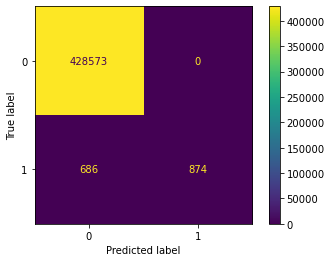

In [22]:
plot_confusion_matrix(clf, X_train_scaled, y_train)

### 8.1.2. Scoring

In [23]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [24]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
0,0.998402,1.000000,0.999200,428573.000000
1,1.000000,0.560256,0.718159,1560.000000
accuracy,0.998405,0.998405,0.998405,0.998405
macro avg,0.999201,0.780128,0.858680,430133.000000
weighted avg,0.998408,0.998405,0.998181,430133.000000


## 8.2. Test Set

### 8.2.1. Confusion Matrix

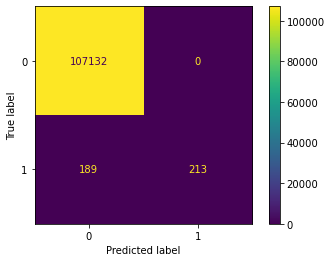

In [25]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

### 8.2.2. Scoring

In [26]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [27]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
0,0.998239,1.000000,0.999119,107132.000000
1,1.000000,0.529851,0.692683,402.000000
accuracy,0.998242,0.998242,0.998242,0.998242
macro avg,0.999119,0.764925,0.845901,107534.000000
weighted avg,0.998246,0.998242,0.997973,107534.000000


# 9. Save Model

In [28]:
import pickle

In [29]:
pickle.dump((clf, 
             one_hot_encoder, 
             scaler, 
             feature_name, 
             numerical_feature, 
             ordinal_feature, 
             nominal_feature), 
            open('credit_card_model.pickle', 'wb'))